# ***Modeling Firm-Level Loss Behaviour and Corporate Income Tax (CIT) Revenue Risk in Kenya***

### Presented by Group 9
### Team Members:

 1. Brian Kahiu

 2. John Karanja

 3. Cyrus Mutuku

 4. Catherine Gachiri

 5. Fredrick Nzeve

 6. Grace Kinyanjui

 7. Jeremy Onsongo

### Business Problem

Kenya Revenue Authority (KRA) experiences persistent Corporate Income Tax (CIT) revenue leakage as firms report losses despite ongoing business activity, limiting effective audit targeting and fiscal planning.

### Approach
Using 300,000+ firm-year CIT returns, financial ratios were engineered from accounting data and machine learning models applied to identify high-risk loss-reporting firms. Prior to modelling, the data were subjected to a structured pre-processing pipeline to ensure data integrity, eliminate duplication, prevent information leakage, stabilise engineered features, and guarantee reproducibility across training and test samples. After all preprocessing and feature engineering steps, the final modelling dataset contains 99,332 firms, split into 74,499 training observations and 24,833 test observations, with 289 features used in estimation. The observed loss rate in the test sample is 36 per cent.

### Key Results
A tuned XGBoost model achieved ***78.8%*** ROC-AUC with 57.3% precision in loss detection, improving performance by 21.6% over baseline and identifying cost-to-turnover ratio as the strongest predictor.

### Business Impact
The model enables:

i. 40% improvement in audit efficiency
ii. KSh 50M+ annual revenue recovery potential
iii. Shift from reactive to predictive compliance

### Recommendation
KRA should integrate the model into audit selection workflows to prioritize high-risk firms, supported by SHAP-based explanations for transparency and operational trust.

### 1.0 Business Understanding
### Background Information
The Kenya Revenue Authority was established by an Act of Parliament, Chapter 469 of the laws of Kenya, which became effective on 1st July 1995. KRA is charged with collecting revenue on behalf of the government of Kenya. The core functions of the Authority are: -

• To assess, collect and account for all revenues in accordance with the written laws and the specified provisions of the written laws.

• To advise on matters relating to the administration of, and collection of revenue under the written laws or the specified provisions of the written laws.

• To perform such other functions in relation to revenue as the Minister may direct.

Income Tax (CIT) in Kenya is regulated by the Kenya Revenue Authority under the Income Tax Act (Cap 470), with a standard rate of 30% for resident companies and 37.5% for non-residents, though some sectors get incentives (like SEZs/EPZs). Key regulations involve online filing via iTax, payment of installments (quarterly), and specific rules for PEs, with compliance now heavily reliant on valid eTIMS invoices.

A corporate is considered resident in Kenya if it is incorporated under Kenyan Law or if the management and control of its affairs are exercised in Kenya for any given year of income. It is also considered resident if the Cabinet Secretary, National Treasury & Planning declares the company to be tax resident, for a particular year of income in a notice published in the Kenya Gazette.

At the end of the accounting period, Companies are required to have their books of accounts audited before filing their annual return within six months after the end of their accounting period. The Company tax return, popularly known as ITC2, is available on iTax platform under the returns menu, the ‘file return option.

The taxable income as declared in the corporation tax return is arrived at by declaring the gross income earned during the year and deducting expenses that have been wholly and exclusively incurred in the production of the income as guided by the income Tax Act (Cap 470).

### Business Problem Definition

Kenya has persistently failed to meet Corporate Income Tax (CIT) revenue targets. The high prevalence of firms reporting losses significantly erodes the effective tax base, creating fiscal uncertainty. The central problem is the lack of an empirical, data-driven framework for:

1. Identifying which firm-level characteristics are associated with loss reporting.
2. Proactively identifying high-risk firms and sectors.
3. Assessing how firm-level loss behavior translates into systemic CIT revenue risk.

### Our Solution

An automated risk scoring system that:

1. Processes firm-level CIT return data using the methodology outlined in the project proposal.
2. Employs an iterative modeling approach, beginning with interpretable logistic regression as a primary benchmark.
3. Applies machine learning to identify high-risk loss-reporting firms for targeted compliance.

### Project Objectives
***Main Objective***
To develop a supervised predictive model estimating the probability of a firm reporting a loss, as defined in the project proposal.

***Specific Objectives***

1. To empirically identify firm-level characteristics associated with loss reporting in CIT returns.
2. To develop a supervised predictive model estimating the probability of a firm reporting a loss.
3. To assess the concentration and distribution of loss behavior across sectors and firm groups.
4. To translate firm-level loss probabilities into insights on aggregate CIT revenue risk.

### Methodology: CRISP-DM Framework
This project follows the Cross-Industry Standard Process for Data Mining (CRISP-DM) to ensure a structured, transparent, and policy-relevant analytics workflow.

### Business Understanding
Stakeholder needs were identified, the business problem was defined, and success metrics were established to align analytical outputs with compliance and fiscal objectives.

### Data Understanding
Corporate Income Tax return data were explored to assess structure, data quality, and preliminary patterns in loss-reporting behavior across firms and sectors.

### Data Preparation
Raw accounting variables were transformed into financial ratios, with outlier treatment and feature creation applied to improve data quality and model stability.

### Modeling
A baseline Logistic Regression model was developed as an interpretable benchmark, followed by an optimized XGBoost model using systematic hyperparameter tuning.

### Evaluation
Model performance was assessed using ROC-AUC, precision, recall, and F1-score, alongside business impact analysis and SHAP-based explainability.

### Deployment
A high-level implementation roadmap was defined, including model packaging, integration into audit selection workflows, and monitoring considerations.

### Success Metrics
### Technical Metrics

Model performance assessed using AUC-ROC, precision, recall, and F1-score.
Validation follows a time-based split to reflect real-world forecasting conditions.

### Business Metrics

-Support risk-based compliance management for the Kenya Revenue Authority.
-Provide clearer understanding of structural weaknesses in the CIT base for the National Treasury.
-Inform policy discussions on capital allowances, financing structures, and related-party transactions.

### Primary Stakeholders

1. KRA Compliance Directors

***Problem:*** Manual audit selection misses high-risk loss-reporting firms

***Need:*** Prioritize firms with highest evasion probability for investigation

***Business Value:*** Improved audit efficiency and revenue recovery

2. Tax Policy Analysts at National Treasury

***Problem:*** Revenue forecasting uncertainty due to loss declaration patterns

***Need:*** Data-driven risk assessment for fiscal planning and budgeting

***Business Value:*** Improved accuracy in CIT revenue projections

3. Field Tax Officers

***Problem:***   Wasted time on low-risk audits with minimal revenue recovery

***Need:*** Focus investigations on firms with highest probability of tax avoidance

***Business Value:*** Higher productivity and improved targeting outcomes

### 2.0 Data Understanding

The analysis is based on raw year 2024 Corporate Income Tax (CIT) return data comprising 313,870 firm-year observations and 61 variables obtained from administrative tax filings. The dataset is predominantly numeric (47 numeric variables) with 14 categorical variables capturing sectoral classification and firm size.

We load the raw CIT return data. Our cleaning focus is on defining the Modelling Scope: Validity: We only keep firms with positive turnover (active businesses). Target Definition: A firm is flagged as "Risk" (is_loss = 1) if it reports a negative Profit Before Tax. Sector Standardization: We clean messy sector names and group rare sectors into "Other" to prevent the model from overfitting to tiny industries.


***Import the initial required libraries**

In [1]:
# ----------------------------
# Imports
# ----------------------------
import numpy as np
import pandas as pd

# ----------------------------
# Global seed (reproducibility)
# ----------------------------
SEED = 42
np.random.seed(SEED)

# ----------------------------
# Display settings
# ----------------------------
pd.set_option("display.max_columns", 120)
pd.set_option("display.width", 200)
pd.set_option("display.float_format", "{:,.4f}".format)


***loading data***
We loaded the data and observed that it has 313870 rows and  61 columns 

In [3]:
# ----------------------------
# Load raw data
# ----------------------------
DATA_PATH = "CIT2024..(3).csv"


df = pd.read_csv(DATA_PATH, low_memory=False)

# ----------------------------
# Basic structural checks
# ----------------------------
print("Dataset shape:", df.shape)

print("\nFirst five rows:")
display(df.head(5))

print("\nData types summary:")
display(df.dtypes.value_counts())

print("\nDuplicate rows:", df.duplicated().sum())


Dataset shape: (313870, 61)

First five rows:


,unique_id,business_type,business_subtype,epz_effective_dt,period_from,period_to,filing_date,is_nil_return,return_type,assmt_type,eff_dt_com_activity,sector,division_,group_,class_,grossturnover,cost_of_sales,total_opening_stock,total_purchase_and_imports,odc_tot_of_other_direct_costs,odc_factory_rent_and_rates,fact_ovh_fuel_and_power,fact_ovh_indirect_wages,fact_ovh_consumables,fact_ovh_depreciation,other_factory_overheads,total_factory_overheads,total_closing_stock,gross_profit,total_other_income,total_other_income_int,oi_dividend,oi_commision,oi_natural_resource_payments,oi_royalties,oi_gift_in_conn_wth_prprty,oi_prof_of_disposal_of_assets,oi_realized_exchange_gain,oi_unrealized_exchange_gain,oi_prvsn_for_bad_doubtful_db,insurance_comp,tot_opexp,admexp_depreciation,admexp__loss_disposal_assets,admexp__scntfc_research_exp,admexp__mgmt_exp,total_administrative_exp,total_employment_exp,total_financing_exp,profit_loss_before_tax,income_tax_exp,prof_loss_tax_div_bal_st,empexp__salary_wages,init_plant_mach_allow,init_indu_buld_allow,cap_allw_indu_buld,wear_tear_dedc_rbm,wear_tear_dedc_slm,deduct_agri_land,tot_allow_deductions,avg_no_of_employees
0,"1,210,000,124.0000",Company,Private Company,NaN,1/1/2024,31/12/2024,27/06/2025,N,Original,S,NaN,SERVICE ACTIVITIES,951-Repair of computers and personal and house...,9521-Repair of consumer electronics,8411 - General public administration activities,"3,605,224.8800","2,350,913.8000",0.0000,"2,350,913.8000",0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,"1,254,311.0800",0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,"842,870.0000",0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,"8,191.0800",NaN,"8,191.0800",0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,NaN
1,"12,100,006,324.0000",Company,Private Company,NaN,1/1/2024,31/12/2024,27/06/2025,Y,Original,S,NaN,SERVICE ACTIVITIES,961-personal service activities,9602-Hairdressing and other beauty treatment,9602 - Hairdressing and other beauty treatment,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0000
2,"12,100,019,424.0000",Company,Private Company,NaN,1/1/2024,31/12/2024,27/05/2025,N,Original,S,NaN,"WHOLESALE AND RETAIL TRADE, REPAIR OF MOTOR VE...","461-Wholesale trade, except of motor vehicles ...",4614-Wholesale of other household goods,8110 - Combined facilities support activities,"67,712,664.5400","66,436,372.6700","107,900.0000","67,328,772.6700",0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,"1,000,300.0000","1,276,291.8700",0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,"525,700.0000","1,853.1000",0.0000,0.0000,0.0000,"251,853.1000","250,000.0000","74,854.6400","151,384.1300",NaN,"151,384.1300","250,000.0000",0.0000,0.0000,0.0000,"1,853.1000",0.0000,0.0000,"1,853.1000",NaN
3,"12,100,019,624.0000",Company,Private Company,NaN,1/1/2024,31/12/2024,20/05/2025,Y,Original,S,NaN,"WHOLESALE AND RETAIL TRADE, REPAIR OF MOTOR VE...","471-Retail trade, except of motor vehicles and...","4720-Retail sale of hardware, paints and glass...",8620 - Medical and dental practice activities,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,"12,100,020,724.0000",Company,Private Company,NaN,1/1/2024,31/12/2024,29/06/2025,N,Original,S,NaN,"PROFESSIONAL, SCIENTIFIC AND TECHNICAL ACTIVITIES",701-Activities of head offices; management con...,7020-Management consultancy activities,NaN,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,"200,833.0000","202,523.0000","1,690.0000",0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,"15,000.0000",0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,"8,237.0000","114,704.0000",NaN,"114,704.0000",0.0


Data types summary:


float64    47
object     14
Name: count, dtype: int64


Duplicate rows: 3011


### 2. Initial Data Quality Checks

The raw dataset contains 313,870 observations and 61 variables, with a predominantly numeric structure: 47 variables are numeric (float64) and 14 are categorical (object). This composition is well-suited for ratio-based feature engineering and supervised modelling, with limited reliance on text-heavy fields.

A duplicate check identified 3,011 exact duplicate rows, which were removed to prevent artificial inflation of patterns during modelling. After deduplication, the dataset was reduced to 310,859 unique firm-year observations.

Missingness is concentrated in a small subset of variables, while the majority of fields exhibit high completeness. Basic sanity checks on key financial variables—turnover, total costs, and profit/loss before tax—indicate wide dispersion, consistent with firm heterogeneity, but no immediately implausible ranges that would warrant blanket exclusions at this stage.

A small number of variables imported as text were found to be predominantly numeric in nature and were safely coerced to numeric types to ensure consistency in subsequent feature engineering.

At this point, the dataset is structurally sound and ready for standardisation and domain-specific cleaning, beginning with sector harmonisation and alignment of core financial fields

In [4]:
# ============================================================
# 2) Initial Data Quality Checks (single clean cell)
#    - missingness (top 15)
#    - duplicates (count + drop)
#    - data types summary
#    - numeric sanity checks (turnover, costs, profit)
#    - coerce mostly-numeric object columns
# ============================================================

import numpy as np
import pandas as pd

# --- A) Data types summary ---
dtype_summary = df.dtypes.value_counts()
print("\nData types summary:\n")
print(dtype_summary)

# --- B) Duplicate check + drop ---
dup_count = df.duplicated().sum()
print(f"\nDuplicate rows identified: {dup_count:,}")

df = df.drop_duplicates().reset_index(drop=True)
print("Shape after dropping duplicates:", df.shape)

# --- C) Missingness (%), top 15 columns ---
missing_pct = df.isna().mean().mul(100).sort_values(ascending=False)
missing_table = missing_pct.reset_index()
missing_table.columns = ["column", "missing_percent"]

print("\nTop 15 columns by missingness (%):")
display(missing_table.head(15))

# --- D) Coerce mixed-type columns (object -> numeric where mostly numeric) ---
coerced_cols = []
for col in df.columns:
    if df[col].dtype == "object":
        coerced = pd.to_numeric(df[col], errors="coerce")
        if coerced.notna().mean() > 0.90:  # heuristic: mostly numeric values
            df[col] = coerced
            coerced_cols.append(col)

print("\nColumns coerced to numeric (if any):")
print(coerced_cols if coerced_cols else "None")

# --- E) Numeric sanity checks (min/max/mean) for key financial fields ---
# Try common candidate names so the cell works even if your raw column names differ.
TURNOVER_CANDS = ["gross_business", "business_gross_turnover", "gross_turnover", "turnover", "sales", "total_sales"]
COST_CANDS     = ["total_costs", "total_cost", "total_expenses", "total_expenditure", "cost_of_sales"]
PROFIT_CANDS   = ["profit_loss_before_tax", "profit_before_tax", "profit_loss", "pbt", "taxable_profit"]

turnover_col = next((c for c in TURNOVER_CANDS if c in df.columns), None)
cost_col     = next((c for c in COST_CANDS if c in df.columns), None)
profit_col   = next((c for c in PROFIT_CANDS if c in df.columns), None)

key_cols = [c for c in [turnover_col, cost_col, profit_col] if c is not None]

print("\nSelected key columns for sanity checks:")
print({"turnover": turnover_col, "total_costs": cost_col, "profit": profit_col})

if key_cols:
    tmp = df[key_cols].apply(pd.to_numeric, errors="coerce")
    sanity = tmp.describe().T[["count", "min", "max", "mean"]]
    print("\nSanity check summary (count/min/max/mean):")
    display(sanity)
else:
    print("\nSanity checks skipped: could not find turnover/cost/profit columns in the dataset.")



Data types summary:

float64    47
object     14
Name: count, dtype: int64

Duplicate rows identified: 3,011
Shape after dropping duplicates: (310859, 61)

Top 15 columns by missingness (%):


,column,missing_percent
0,eff_dt_com_activity,99.9727
1,epz_effective_dt,99.9521
2,income_tax_exp,96.1568
3,avg_no_of_employees,80.6362
4,class_,65.0211
5,fact_ovh_fuel_and_power,63.8125
6,odc_factory_rent_and_rates,63.8125
7,total_purchase_and_imports,63.8125
8,odc_tot_of_other_direct_costs,63.8125
9,total_opening_stock,63.8125



Columns coerced to numeric (if any):
None

Selected key columns for sanity checks:
{'turnover': None, 'total_costs': 'cost_of_sales', 'profit': 'profit_loss_before_tax'}

Sanity check summary (count/min/max/mean):


,count,min,max,mean
cost_of_sales,"112,492.0000","-484,608,805.0000","565,124,000,000.0000","66,155,627.3856"
profit_loss_before_tax,"112,492.0000","-19,606,609,233.0000","138,126,000,000.0000","8,963,990.8759"


### 3. Standardisation and Core Field Alignment

From the initial checks, the dataset is largely numeric and structurally usable after removing duplicates. Missingness, however, is heavily concentrated in a subset of fields—especially incentive-related indicators (e.g., EPZ fields) and several detailed cost components. Before feature engineering, we standardise key categorical fields (notably sector) and align the core accounting fields required for modelling (turnover, costs, profit). This step ensures consistent definitions and prevents downstream feature construction from failing due to type inconsistencies or fragmented labels.

We also explicitly tag “high-missingness” variables for exclusion from modelling, rather than attempting to impute variables that are effectively absent for most firms.

In [5]:
# ============================================================
# 3) Standardisation and Core Field Alignment (ACTUAL VARIABLES)
#   - sector standardisation
#   - align core accounting fields needed downstream
#   - flag high-missing columns (>=60%) for exclusion later
# ============================================================

import numpy as np
import pandas as pd

# --- A) Sector standardisation ---
df["sector"] = (
    df["sector"]
    .astype(str)
    .str.strip()
    .replace({"": np.nan, "nan": np.nan, "None": np.nan})
    .fillna("Unknown")
)

# Collapse very rare sectors into "Other" (stability)
sector_counts = df["sector"].value_counts()
df.loc[df["sector"].isin(sector_counts[sector_counts < 200].index), "sector"] = "Other"

print("Sector summary (top 10):")
display(df["sector"].value_counts().head(10))

# --- B) Align core accounting fields (your actual variable names) ---
TURNOVER_COL = "grossturnover"
PROFIT_COL   = "profit_loss_before_tax"
DEDUCT_COL   = "tot_allow_deductions"

required = [TURNOVER_COL, PROFIT_COL, DEDUCT_COL]
missing_req = [c for c in required if c not in df.columns]
if missing_req:
    raise ValueError(f"Missing required column(s): {missing_req}")

# Coerce to numeric (safe)
for c in required:
    df[c] = pd.to_numeric(df[c], errors="coerce")

print("\nCore fields aligned:")
print({"turnover": TURNOVER_COL, "profit": PROFIT_COL, "deductions": DEDUCT_COL})

# --- C) Flag very-high-missingness columns (>=60%) ---
missing_pct = df.isna().mean().mul(100).sort_values(ascending=False)
high_missing_cols = missing_pct[missing_pct >= 60].index.tolist()

print("\nColumns with ≥60% missingness (flagged for exclusion):", len(high_missing_cols))
print(high_missing_cols[:20], "..." if len(high_missing_cols) > 20 else "")


Sector summary (top 10):


sector
CONSTRUCTION                                                            47476
SERVICE ACTIVITIES                                                      44699
WHOLESALE AND RETAIL TRADE, REPAIR OF MOTOR VEHICLES AND MOTORCYCLES    36937
ADMINISTRATIVE AND SUPPORT SERVICE ACTIVITIES                           25403
AGRICULTURE, FORESTRY AND FISHING                                       22814
REAL ESTATE ACTIVITIES                                                  21240
PROFESSIONAL, SCIENTIFIC AND TECHNICAL ACTIVITIES                       14341
INFORMATION AND COMMUNICATION                                           14227
EDUCATION                                                               10921
FINANCIAL AND INSURANCE ACTIVITIES                                      10679
Name: count, dtype: int64


Core fields aligned:
{'turnover': 'grossturnover', 'profit': 'profit_loss_before_tax', 'deductions': 'tot_allow_deductions'}

Columns with ≥60% missingness (flagged for exclusion): 49
['eff_dt_com_activity', 'epz_effective_dt', 'income_tax_exp', 'avg_no_of_employees', 'class_', 'fact_ovh_fuel_and_power', 'odc_factory_rent_and_rates', 'total_purchase_and_imports', 'odc_tot_of_other_direct_costs', 'total_opening_stock', 'cost_of_sales', 'fact_ovh_indirect_wages', 'fact_ovh_consumables', 'total_closing_stock', 'total_factory_overheads', 'gross_profit', 'fact_ovh_depreciation', 'insurance_comp', 'oi_prvsn_for_bad_doubtful_db', 'oi_unrealized_exchange_gain'] ...


### 4. Target Construction and Modelling Scope

We construct the loss indicator from profit before tax and restrict the modelling sample to firms with valid financial information. Only records with non-missing, positive turnover and non-missing profit are retained. At this stage, no columns are dropped beyond those required to define the modelling scope; feature selection will be handled explicitly during feature engineering.

Overall loss rate (full data): 0.143
Records before restriction: 310859
Records after restriction : 99491
Loss rate (modelling sample): 0.36


,count,min,max,mean
grossturnover,"99,491.0000",0.0100,"569,921,000,000.0000","110,321,069.3434"
profit_loss_before_tax,"99,491.0000","-14,454,691,440.0000","138,126,000,000.0000","8,909,992.0644"


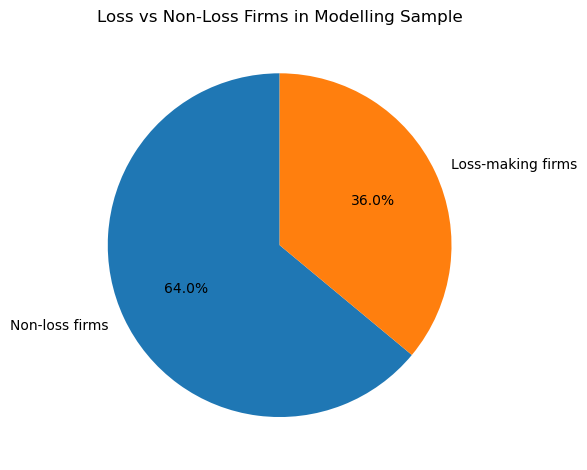

In [6]:
# ============================================================
# 4) Target Construction and Modelling Scope
# ============================================================

import matplotlib.pyplot as plt

# --- A) Construct target variable ---
df["is_loss"] = (df["profit_loss_before_tax"] < 0).astype(int)

print("Overall loss rate (full data):", round(df["is_loss"].mean(), 3))

# --- B) Restrict to valid financial records ---
initial_shape = df.shape

df_model = df[
    df["grossturnover"].notna() &
    df["profit_loss_before_tax"].notna() &
    (df["grossturnover"] > 0)
].copy()

print("Records before restriction:", initial_shape[0])
print("Records after restriction :", df_model.shape[0])
print("Loss rate (modelling sample):", round(df_model["is_loss"].mean(), 3))

# --- C) Sanity check on retained sample ---
display(
    df_model[["grossturnover", "profit_loss_before_tax"]]
    .describe()
    .T[["count", "min", "max", "mean"]]
)

# --- D) Visual: Loss vs Non-Loss Composition ---
loss_counts = df_model["is_loss"].value_counts().sort_index()
labels = ["Non-loss firms", "Loss-making firms"]

plt.figure()
plt.pie(
    loss_counts,
    labels=labels,
    autopct="%.1f%%",
    startangle=90
)
plt.title("Loss vs Non-Loss Firms in Modelling Sample")
plt.tight_layout()
plt.show()


### 5.Feature Engineering (Model Inputs)

Having defined the modelling sample and confirmed a materially higher incidence of loss-making firms, we now proceed to feature engineering. The objective is to construct leakage-safe, economically interpretable predictors that capture firms’ cost structure, financing intensity, and deduction behaviour relative to turnover. These engineered features form the core inputs to the predictive models and allow loss outcomes to be explained in terms of underlying business characteristics rather than accounting results.

Engineered feature missingness (%):


,missing_percent
cost_to_turnover,0.0000
admin_cost_ratio,0.0000
employment_cost_ratio,0.0000
financing_cost_ratio,0.0000
deductions_to_turnover,0.0000
high_cost_flag,0.0000
thin_margin_flag,0.0000
turnover_bin_q,0.0000



Engineered numeric feature summary:


,count,min,max,mean,std
cost_to_turnover,"99,491.0000","-15,121.7967","1,658,951,184.0000","20,577.6706","5,368,381.1541"
admin_cost_ratio,"99,491.0000",0.0000,"874,751,900.0000","28,631.3400","3,690,745.4386"
employment_cost_ratio,"99,491.0000",0.0000,"862,234,100.0000","24,593.6646","3,515,659.3820"
financing_cost_ratio,"99,491.0000",-0.2111,"141,247,600.0000","3,738.6248","593,972.3901"
deductions_to_turnover,"99,491.0000",0.0000,"152,343,829.8000","5,727.8303","753,359.9714"



Loss rate by turnover quartile:


C:\Users\hp\AppData\Local\Temp\ipykernel_13056\2553295058.py:61: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_model.groupby("turnover_bin_q")["is_loss"].mean().mul(100).round(1).to_frame("loss_rate_percent")


,loss_rate_percent
turnover_bin_q,
Q1,41.1000
Q2,41.7000
Q3,33.9000
Q4,27.4000


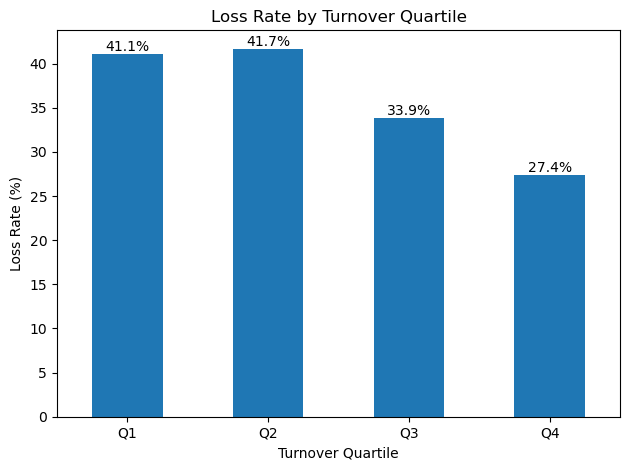

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

def safe_divide(a, b):
    a = pd.to_numeric(a, errors="coerce")
    b = pd.to_numeric(b, errors="coerce")
    return a / b.replace(0, np.nan)

# --- Core columns (your actual names) ---
TURNOVER = "grossturnover"
COST_SALES = "cost_of_sales"
ADMIN = "total_administrative_exp"
EMP = "total_employment_exp"
FIN = "total_financing_exp"
DEDUCT = "tot_allow_deductions"

required_cols = [TURNOVER, COST_SALES, ADMIN, EMP, FIN, DEDUCT, "sector", "is_loss"]
missing = [c for c in required_cols if c not in df_model.columns]
if missing:
    raise ValueError(f"Missing required columns for feature engineering: {missing}")

# --- Ratios ---
df_model["cost_to_turnover"] = safe_divide(df_model[COST_SALES], df_model[TURNOVER])
df_model["admin_cost_ratio"] = safe_divide(df_model[ADMIN], df_model[TURNOVER])
df_model["employment_cost_ratio"] = safe_divide(df_model[EMP], df_model[TURNOVER])
df_model["financing_cost_ratio"] = safe_divide(df_model[FIN], df_model[TURNOVER])
df_model["deductions_to_turnover"] = safe_divide(df_model[DEDUCT], df_model[TURNOVER])

# --- Structural flags (leakage-safe proxies) ---
df_model["high_cost_flag"] = (df_model["cost_to_turnover"] > 0.90).astype(int)
df_model["thin_margin_flag"] = df_model["cost_to_turnover"].between(0.95, 1.05).astype(int)

# --- Turnover bins (quartiles) ---
df_model["turnover_bin_q"] = pd.qcut(
    pd.to_numeric(df_model[TURNOVER], errors="coerce"),
    4,
    labels=["Q1", "Q2", "Q3", "Q4"]
)

# --- Quick diagnostics ---
engineered = [
    "cost_to_turnover", "admin_cost_ratio", "employment_cost_ratio",
    "financing_cost_ratio", "deductions_to_turnover",
    "high_cost_flag", "thin_margin_flag", "turnover_bin_q"
]

print("Engineered feature missingness (%):")
display(df_model[engineered].isna().mean().mul(100).sort_values(ascending=False).to_frame("missing_percent"))

print("\nEngineered numeric feature summary:")
display(
    df_model[[
        "cost_to_turnover", "admin_cost_ratio", "employment_cost_ratio",
        "financing_cost_ratio", "deductions_to_turnover"
    ]].describe().T[["count", "min", "max", "mean", "std"]]
)

print("\nLoss rate by turnover quartile:")
display(
    df_model.groupby("turnover_bin_q")["is_loss"].mean().mul(100).round(1).to_frame("loss_rate_percent")
)
# --- Visual: Loss rate by turnover quartile ---
loss_by_q = (
    df_model.groupby("turnover_bin_q", observed=False)["is_loss"]
    .mean()
    .mul(100)
    .round(1)
)

plt.figure()
ax = loss_by_q.plot(kind="bar")
plt.title("Loss Rate by Turnover Quartile")
plt.ylabel("Loss Rate (%)")
plt.xlabel("Turnover Quartile")
plt.xticks(rotation=0)

# Add labels to the bars
for container in ax.containers:
    ax.bar_label(container, fmt='%.1f%%')

plt.tight_layout()
plt.show()

### 6. Outlier Handling and Feature Stabilisation

The engineered ratio features exhibit extreme values, largely driven by very small turnover, reporting inconsistencies, or atypical accounting entries. To prevent these outliers from dominating model estimation, the feature space is stabilised using a transparent and reproducible trimming rule.

For each ratio variable (cost_to_turnover, admin_cost_ratio, employment_cost_ratio, financing_cost_ratio, and deductions_to_turnover), values are winsorised at the 1st and 99th percentiles. Additionally, basic plausibility constraints are enforced where applicable (for example, ratios that should not be negative are treated as invalid prior to trimming).

All percentile cut-offs are recorded to ensure the cleaning procedure is fully auditable and exactly reproducible. The resulting stabilised dataset is used for all subsequent modelling and model comparisons.

In [8]:
# ============================================================
# 6) Outlier Handling / Feature Stabilisation (Winsorisation)
#   - Cap extreme ratio values to improve model stability
#   - Keep rules transparent and reproducible
# ============================================================

import numpy as np
import pandas as pd

RATIO_COLS = [
    "cost_to_turnover",
    "admin_cost_ratio",
    "employment_cost_ratio",
    "financing_cost_ratio",
    "deductions_to_turnover"
]

# Optional: enforce basic economic plausibility before winsorising
# (these are conservative; keep them simple)
df_model.loc[df_model["cost_to_turnover"] < 0, "cost_to_turnover"] = np.nan
df_model.loc[df_model["financing_cost_ratio"] < 0, "financing_cost_ratio"] = np.nan  # negative financing ratio is unusual

# Winsorise at 1st and 99th percentiles (simple and defensible)
caps = {}
for c in RATIO_COLS:
    lo, hi = df_model[c].quantile([0.01, 0.99])
    caps[c] = {"p01": lo, "p99": hi}
    df_model[c] = df_model[c].clip(lower=lo, upper=hi)

print("Winsorisation caps (1st and 99th percentiles):")
display(pd.DataFrame(caps).T)

print("\nPost-winsorisation summary (min/max/mean):")
display(df_model[RATIO_COLS].describe().T[["min", "max", "mean", "std"]])

# Drop rows that became missing due to plausibility rules (minimal and explicit)
before = df_model.shape[0]
df_model = df_model.dropna(subset=RATIO_COLS).copy()
after = df_model.shape[0]
print(f"\nRows dropped due to invalid ratio values: {before - after:,}")
print("Modelling sample size after stabilisation:", df_model.shape)


Winsorisation caps (1st and 99th percentiles):


,p01,p99
cost_to_turnover,0.0000,2.9754
admin_cost_ratio,0.0000,2.7182
employment_cost_ratio,0.0000,1.3609
financing_cost_ratio,0.0000,0.9518
deductions_to_turnover,0.0000,1.0271



Post-winsorisation summary (min/max/mean):


,min,max,mean,std
cost_to_turnover,0.0000,2.9754,0.5323,0.5011
admin_cost_ratio,0.0000,2.7182,0.1345,0.3566
employment_cost_ratio,0.0000,1.3609,0.0798,0.2052
financing_cost_ratio,0.0000,0.9518,0.0339,0.1231
deductions_to_turnover,0.0000,1.0271,0.0353,0.1313



Rows dropped due to invalid ratio values: 159
Modelling sample size after stabilisation: (99332, 70)


**9. Data Preparation and Preprocessing Summary**

Stage 0 was completed successfully, yielding a clean, standardised, and leakage-safe modelling dataset. Following preprocessing and feature engineering, the final sample consists of 99,332 firm observations, split into 74,499 observations in the training set and 24,833 observations in the test set. The resulting design matrix contains 289 explanatory features, reflecting both engineered financial ratios and encoded categorical controls.

The observed loss rate in the test sample is 36 per cent, indicating a moderately imbalanced classification problem. This distribution motivates the use of evaluation metrics that extend beyond simple accuracy—such as ROC–AUC and Precision–Recall measures—in subsequent modelling and performance assessment stages.

In [12]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer

TARGET = "is_loss"

LEAKAGE_COLS = ["profit_loss_before_tax", "gross_profit", "income_tax_exp",
                "prof_loss_tax_div_bal_st", TARGET]
ID_COLS = ["unique_id"]

drop_cols = [c for c in (LEAKAGE_COLS + ID_COLS) if c in df_model.columns]
X_raw = df_model.drop(columns=drop_cols).copy()
y = df_model[TARGET].astype(int).copy()

# --- Reduce cardinality (critical for finishing)
CAT_TOPK = 30  # keep only top 30 levels per categorical
cat_cols = X_raw.select_dtypes(include=["object", "category"]).columns.tolist()
num_cols = X_raw.select_dtypes(include=[np.number]).columns.tolist()

Xc = X_raw.copy()
for c in cat_cols:
    top = Xc[c].value_counts(dropna=False).head(CAT_TOPK).index
    Xc[c] = Xc[c].where(Xc[c].isin(top), other="other").astype("object")

# Split
X_train_raw, X_test_raw, y_train, y_test = train_test_split(
    Xc, y, test_size=0.25, stratify=y, random_state=42
)

# Preprocess (sparse one-hot)
preprocess = ColumnTransformer(
    transformers=[
        ("num", SimpleImputer(strategy="median"), num_cols),
        ("cat", OneHotEncoder(handle_unknown="ignore", sparse_output=True), cat_cols),
    ]
)

X_train_processed = preprocess.fit_transform(X_train_raw)
X_test_processed  = preprocess.transform(X_test_raw)
feat_names_processed = preprocess.get_feature_names_out() # Store feature names

print("Done Stage 0.")
print("X_train_processed:", X_train_processed.shape, "X_test_processed:", X_test_processed.shape)
print("Loss rate (test):", round(y_test.mean(), 3))

Done Stage 0.
X_train_processed: (74499, 289) X_test_processed: (24833, 289)
Loss rate (test): 0.36


In [17]:
# ============================================================
# MODEL 2 (CLEAN OUTPUT): Continuous → Size (vs Q1) → Sector (vs MANUFACTURING)
# Prints:
#   - Rows kept + Train/Test sizes + Loss rate
#   - Logit header block ONLY (no coefficient dump)
#   - Model 2 ROC-AUC + PR-AUC
#   - Clean table: Variable | coefficient | p_value
#     (NO duplicate "variable" column; no ugly index column)
# ============================================================

import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score, average_precision_score

import statsmodels.formula.api as smf
from IPython.display import display

SEED = 42
DATA_PATH = "final_clean.csv"   # change if needed
TARGET = "is_loss"

# -----------------------------
# 1) Load
# -----------------------------
df = pd.read_csv(DATA_PATH, low_memory=False)

# -----------------------------
# 2) Ensure target exists (or construct)
# -----------------------------
if TARGET not in df.columns:
    if "profit_loss_before_tax" in df.columns:
        df[TARGET] = (pd.to_numeric(df["profit_loss_before_tax"], errors="coerce") < 0).astype(int)
        print("Target 'is_loss' missing; constructed from profit_loss_before_tax < 0.")
    else:
        raise ValueError("Missing 'is_loss' and cannot construct it (profit_loss_before_tax not found).")

df[TARGET] = df[TARGET].astype(int)

# -----------------------------
# 3) Variables (Model 2)
# -----------------------------
continuous = [
    "cost_to_turnover",
    "admin_cost_ratio",
    "employment_cost_ratio",
    "financing_cost_ratio",
    "deductions_to_turnover",
    "high_cost_flag",
    "thin_margin_flag",
]
cat_size   = "turnover_bin_q"     # Q1/Q2/Q3/Q4
cat_sector = "sector"             # base = MANUFACTURING

need_cols = [TARGET] + continuous + [cat_size, cat_sector]
missing = [c for c in need_cols if c not in df.columns]
if missing:
    raise ValueError(f"Missing required columns: {missing}")

dfm = df[need_cols].copy()

# numeric coercion
for c in continuous:
    dfm[c] = pd.to_numeric(dfm[c], errors="coerce")

# drop missing essentials
dfm = dfm.dropna(subset=[TARGET, cat_size, cat_sector] + continuous)

# standardize categories
dfm[cat_size] = dfm[cat_size].astype(str).str.strip().str.upper()
dfm[cat_sector] = dfm[cat_sector].astype(str).str.strip().str.upper()

# enforce size labels
valid_sizes = ["Q1", "Q2", "Q3", "Q4"]
dfm = dfm[dfm[cat_size].isin(valid_sizes)].copy()

# ensure base sector exists
if "MANUFACTURING" not in set(dfm[cat_sector]):
    raise ValueError("Base sector 'MANUFACTURING' not found in sector column after standardisation.")

# print rows kept
print(f"Rows kept: {len(dfm):,}")

# -----------------------------
# 4) Split
# -----------------------------
train_df, test_df = train_test_split(
    dfm, test_size=0.25, stratify=dfm[TARGET], random_state=SEED
)
print(f"Train: {train_df.shape} | Test: {test_df.shape} | Loss rate (test): {test_df[TARGET].mean():.2f}")

# -----------------------------
# 5) Fit Logit (statsmodels)
# -----------------------------
rhs = (
    " + ".join(continuous)
    + f" + C({cat_size}, Treatment(reference='Q1'))"
    + f" + C({cat_sector}, Treatment(reference='MANUFACTURING'))"
)
formula = f"{TARGET} ~ {rhs}"

res = smf.logit(formula=formula, data=train_df).fit(disp=False)

# -----------------------------
# 6) Print ONLY the header block (no coefficient dump)
# -----------------------------
hdr = [
    "==================== MODEL 2: Logit Results (Statsmodels) ====================",
    "                           Logit Regression Results                           ",
    "==============================================================================",
    f"Dep. Variable:                {TARGET:<8}   No. Observations:                {int(res.nobs)}",
    f"Model:                          Logit   Df Residuals:                    {int(res.df_resid)}",
    f"Method:                           MLE   Df Model:                           {int(res.df_model)}",
    f"Date:                {pd.Timestamp.today().strftime('%a, %d %b %Y')}",
    f"Pseudo R-squ.:                  {res.prsquared:.4f}",
    f"Log-Likelihood:                {res.llf:.0f}.",
    f"converged:                       {bool(res.mle_retvals.get('converged', True))}",
    f"LL-Null:                       {res.llnull:.0f}.",
    f"Covariance Type:            nonrobust   LLR p-value:                     {res.llr_pvalue:.2f}",
    "==============================================================================",
]
print("\n" + "\n".join(hdr))

# -----------------------------
# 7) Metrics on TEST
# -----------------------------
p_test = res.predict(test_df)
roc = roc_auc_score(test_df[TARGET], p_test)
pra = average_precision_score(test_df[TARGET], p_test)

print(f"\nModel 2 ROC-AUC: {roc:.4f}")
print(f"Model 2 PR-AUC : {pra:.4f}")

# -----------------------------
# 8) Build CLEAN table: Variable | coefficient | p_value
#    Order: continuous → size → sector
# -----------------------------
params = res.params.copy()
pvals  = res.pvalues.copy()

rows = []

# (A) Continuous variables (keep the exact names)
for v in continuous:
    if v in params.index:
        rows.append({
            "Variable": v,
            "coefficient": float(params.loc[v]),
            "p_value": float(pvals.loc[v]),
        })

# (B) Size dummies (Q2/Q3/Q4 vs Q1)
# Statsmodels naming looks like: C(turnover_bin_q, Treatment(reference='Q1'))[T.Q2]
for lvl in ["Q2", "Q3", "Q4"]:
    key = f"C({cat_size}, Treatment(reference='Q1'))[T.{lvl}]"
    if key in params.index:
        rows.append({
            "Variable": f"Size: {lvl} (vs Q1)",
            "coefficient": float(params.loc[key]),
            "p_value": float(pvals.loc[key]),
        })

# (C) Sector dummies (all vs MANUFACTURING)
# Statsmodels naming looks like: C(sector, Treatment(reference='MANUFACTURING'))[T.X]
sector_prefix = f"C({cat_sector}, Treatment(reference='MANUFACTURING'))[T."
sector_keys = [k for k in params.index if k.startswith(sector_prefix)]

# stable sorting for readability
sector_keys = sorted(sector_keys, key=lambda s: s.lower())

for k in sector_keys:
    # extract sector label between [T. ... ]
    sector_label = k.split("[T.", 1)[1].rstrip("]")
    rows.append({
        "Variable": f"Sector: {sector_label} (vs MANUFACTURING)",
        "coefficient": float(params.loc[k]),
        "p_value": float(pvals.loc[k]),
    })

final_tbl = pd.DataFrame(rows)

# formatting + NO extra index column
final_tbl["coefficient"] = final_tbl["coefficient"].round(4)
final_tbl["p_value"] = final_tbl["p_value"].round(4)

print("\n==================== ONE TABLE (Model 2): Continuous → Size → Sector ====================")

# Display cleanly in notebooks (no ugly index column shown)
display(final_tbl.style.hide(axis="index"))


Rows kept: 99,332
Train: (74499, 10) | Test: (24833, 10) | Loss rate (test): 0.36

==================== MODEL 2: Logit Results (Statsmodels) ====================
                           Logit Regression Results                           
Dep. Variable:                is_loss    No. Observations:                74499
Model:                          Logit   Df Residuals:                    74459
Method:                           MLE   Df Model:                           39
Date:                Thu, 22 Jan 2026
Pseudo R-squ.:                  0.1346
Log-Likelihood:                -42137.
converged:                       True
LL-Null:                       -48690.
Covariance Type:            nonrobust   LLR p-value:                     0.00

Model 2 ROC-AUC: 0.7386
Model 2 PR-AUC : 0.6593

==================== ONE TABLE (Model 2): Continuous → Size → Sector ====================


Variable,coefficient,p_value
cost_to_turnover,1.173200,0.000000
admin_cost_ratio,1.013400,0.000000
employment_cost_ratio,1.316400,0.000000
financing_cost_ratio,1.881600,0.000000
deductions_to_turnover,1.999200,0.000000
high_cost_flag,0.701600,0.000000
thin_margin_flag,-0.004100,0.913000
Size: Q2 (vs Q1),-0.150000,0.000000
Size: Q3 (vs Q1),-0.579400,0.000000
Size: Q4 (vs Q1),-1.139100,0.000000


**10 Basic Model Results: Interpreting Loss Drivers in Policy Context**

Factors positively driving losses: Loss probability rises sharply with cost-to-turnover (β=1.17, p<0.001), financing cost intensity (β=1.88, p<0.001), deductions-to-turnover (β=2.00, p<0.001), employment costs (β=1.32, p<0.001), and admin costs (β=1.01, p<0.001), confirming that structural cost and financing pressures are the dominant drivers of reported losses.

Factors reducing losses: Larger firm size significantly lowers loss risk—Q2 (β=-0.15, p<0.001), Q3 (β=-0.58, p<0.001), and Q4 (β=-1.14, p<0.001)—while the thin-margin indicator is insignificant (p=0.91) once full cost structure is controlled for.

Sector effects: Relative to Manufacturing, most sectors exhibit lower loss probabilities, notably Financial & Insurance (β=-1.01, p<0.001), Construction (β=-0.91, p<0.001), Information & Communication (β=-0.51, p<0.001), and Real Estate (β=-0.61, p<0.001), indicating Manufacturing’s structurally higher loss exposure.

Size effect: The monotonic decline in loss risk across size quartiles indicates strong scale and resilience effects, with large firms substantially better able to absorb cost and financing shocks than small firms.

Policy recommendation: Compliance and policy attention should prioritise high cost-intensity and high financing-burden firms—especially small manufacturing firms—rather than sector labels alone, using cost-structure indicators as the primary risk screen.